## Disaster tweets classification

In [1]:
import pandas as pd
import numpy as np

In [3]:
# Training dataset

data=pd.read_csv("disaster_tweets_train.csv")
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
data.shape

(7613, 5)

### To see null values

In [8]:
data.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

### To drop columns that are not useful

In [11]:
drop_columns = ['keyword', 'location']
data.drop(columns=drop_columns, inplace=True)
data.head()

,id,text,target
0,1,Our Deeds are the Reason of this #earthquake M...,1
1,4,Forest fire near La Ronge Sask. Canada,1
2,5,All residents asked to 'shelter in place' are ...,1
3,6,"13,000 people receive #wildfires evacuation or...",1
4,7,Just got sent this photo from Ruby #Alaska as ...,1


In [13]:
data['target'].value_counts()

target
0    4342
1    3271
Name: count, dtype: int64

### real disaster=1, no disaster=0

<Axes: xlabel='target', ylabel='count'>

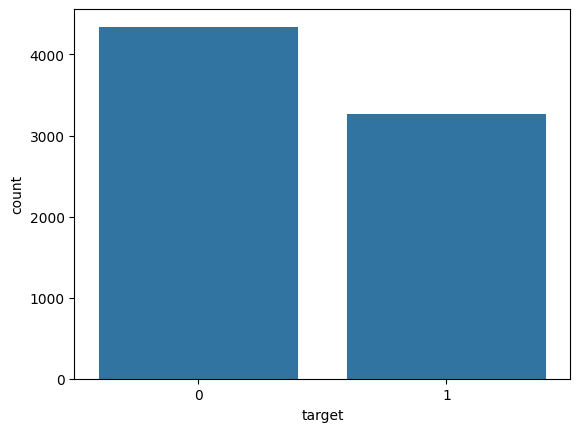

In [16]:

import seaborn as sns
sns.countplot(x=data['target'])

In [17]:
# Testing data

test_df=pd.read_csv("twitter_test.csv")

test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [18]:
test_df.isnull().sum()

id             0
keyword       26
location    1105
text           0
dtype: int64

In [19]:
test_df.shape

(3263, 4)

In [20]:
X=data['text']
y=data['target']
X_test=test_df['text']

## TO Train and test

In [27]:
from sklearn.model_selection import train_test_split

X_train,X_val,y_train,y_val=train_test_split(X,
                                             y,
                                              test_size=0.2,
                                              random_state=2024,
                                              stratify=y
                                              )


In [29]:
X_train.head()

7187    BUT I will be uploading these videos ASAP so y...
1278            Don't get burned twice by the same flame.
3302    The EFAK would be designed for building occupa...
1872    Only had a crush on one girl in high school an...
6849    games that I really hope to see in AGDQ: Traum...
Name: text, dtype: object

In [31]:
X_train[7187]

'BUT I will be uploading these videos ASAP so you guys get to see the new weapon types in action!'

In [33]:
X_train.shape

(6090,)

In [35]:
X_test.head()

0                   Just happened a terrible car crash
1    Heard about #earthquake is different cities, s...
2    there is a forest fire at spot pond, geese are...
3             Apocalypse lighting. #Spokane #wildfires
4        Typhoon Soudelor kills 28 in China and Taiwan
Name: text, dtype: object

In [37]:
X_test.shape

(3263,)

## KNN with n_neighbors=10, metric=euclidean

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report


pipeline = Pipeline([
    ('vect', CountVectorizer(ngram_range=(1, 3))),  
    ('clf', KNeighborsClassifier(n_neighbors=10, metric='euclidean'))
])


# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

y_pred=pipeline.predict(X_val)
print(classification_report(y_val,y_pred))


              precision    recall  f1-score   support

           0       0.60      1.00      0.75       869
           1       0.97      0.13      0.23       654

    accuracy                           0.63      1523
   macro avg       0.79      0.56      0.49      1523
weighted avg       0.76      0.63      0.53      1523



## KNN with n_neighbor=10, metric=cosine

In [43]:
# Define the pipeline
pipeline = Pipeline([
    ('vect', CountVectorizer(ngram_range=(1, 3))),  # Unigrams, bigrams, and trigrams
    ('clf', KNeighborsClassifier(n_neighbors=10, metric='cosine'))
])


# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

y_pred=pipeline.predict(X_val)
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.94      0.79       869
           1       0.84      0.42      0.56       654

    accuracy                           0.72      1523
   macro avg       0.76      0.68      0.68      1523
weighted avg       0.75      0.72      0.69      1523



## Random Forest

In [46]:

from sklearn.ensemble import RandomForestClassifier

# Define the pipeline
RF = Pipeline([
    ('vect', CountVectorizer(ngram_range=(3, 3))),  # Trigrams
    ('clf', RandomForestClassifier())  # Random Forest classifier
])



# Fit the pipeline on the training data
RF.fit(X_train, y_train)

y_pred=RF.predict(X_val)
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.66      0.98      0.78       869
           1       0.91      0.32      0.47       654

    accuracy                           0.69      1523
   macro avg       0.78      0.65      0.63      1523
weighted avg       0.77      0.69      0.65      1523



## Multinomial NB with alpha=0.75

In [49]:

from sklearn.naive_bayes import MultinomialNB

# Define the pipeline
NB = Pipeline([
    ('vect', CountVectorizer(ngram_range=(1, 2))),  # Unigrams and bigrams
    ('clf', MultinomialNB(alpha=0.75))  # Multinomial Naive Bayes classifier with alpha=0.75
])


# Fit the pipeline on the training data
NB.fit(X_train, y_train)

y_pred=NB.predict(X_val)

print(classification_report(y_val,y_pred))



              precision    recall  f1-score   support

           0       0.79      0.88      0.83       869
           1       0.81      0.68      0.74       654

    accuracy                           0.79      1523
   macro avg       0.80      0.78      0.78      1523
weighted avg       0.79      0.79      0.79      1523



## Apply preprocess text by removing stop words and applying bag of words and lemmatization

In [27]:
import spacy
nlp = spacy.load('en_core_web_sm')

def preprocess_text(text):
    doc = nlp(text)
    filtered_tokens = []
    
    for token in doc:
        if not token.is_stop and not token.is_punct:
            filtered_tokens.append(token.lemma_)
    
    return " ".join(filtered_tokens)


C:\Users\karth\anaconda3\envs\NLP\Lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


In [28]:
data['preprocess_text']=data.text.apply(preprocess_text)

In [35]:
test_df['preprocess_text']=test_df.text.apply(preprocess_text)

In [37]:
data.head()

,id,text,target,preprocess_text
0,1,Our Deeds are the Reason of this #earthquake M...,1,deed Reason earthquake ALLAH forgive
1,4,Forest fire near La Ronge Sask. Canada,1,forest fire near La Ronge Sask Canada
2,5,All residents asked to 'shelter in place' are ...,1,resident ask shelter place notify officer evac...
3,6,"13,000 people receive #wildfires evacuation or...",1,"13,000 people receive wildfire evacuation orde..."
4,7,Just got sent this photo from Ruby #Alaska as ...,1,get send photo Ruby Alaska smoke wildfire pour...


In [39]:
X=data['preprocess_text']
y=data['target']
X_test=test_df['preprocess_text']

## Random Forest

In [42]:
from sklearn.model_selection import train_test_split

X_train,X_val,y_train,y_val=train_test_split(X,
                                             y,
                                              test_size=0.2,
                                              random_state=2024,
                                              stratify=y
                                              )


In [49]:

from sklearn.ensemble import RandomForestClassifier

# Define the pipeline
RF = Pipeline([
    ('vect', CountVectorizer(ngram_range=(3, 3))),  # Trigrams
    ('clf', RandomForestClassifier())  # Random Forest classifier
])



# Fit the pipeline on the training data
RF.fit(X_train, y_train)

y_pred=RF.predict(X_val)
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.66      0.97      0.78       869
           1       0.90      0.33      0.48       654

    accuracy                           0.70      1523
   macro avg       0.78      0.65      0.63      1523
weighted avg       0.76      0.70      0.65      1523



In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

model = Sequential([
    Dense(180, activation='relu', input_shape=(1,)),
    Dropout(0.2),
    Dense(170, activation='relu'),
    Dropout(0.2),
    Dense(100, activation='relu'),
    Dropout(0.2),
    Dense(50, activation='relu'),
    Dense(1, activation='sigmoid')  # Use sigmoid activation for binary classification
])

optimizer = Adam(learning_rate=0.001)

model.compile(
    loss='binary_crossentropy',  # Use binary crossentropy for binary classification
    optimizer=optimizer,
    metrics=['accuracy']  # 'accuracy' is typically used for binary classification
)

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    epochs=200,
    verbose=1,
    validation_split=0.2,
    callbacks=[early_stopping]
)


Epoch 1/200


C:\Users\karth\anaconda3\envs\NLP\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


UnimplementedError: Graph execution error:

Detected at node sequential_1/Cast defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "C:\Users\karth\anaconda3\envs\NLP\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>

  File "C:\Users\karth\anaconda3\envs\NLP\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance

  File "C:\Users\karth\anaconda3\envs\NLP\Lib\site-packages\ipykernel\kernelapp.py", line 701, in start

  File "C:\Users\karth\anaconda3\envs\NLP\Lib\site-packages\tornado\platform\asyncio.py", line 205, in start

  File "C:\Users\karth\anaconda3\envs\NLP\Lib\asyncio\windows_events.py", line 321, in run_forever

  File "C:\Users\karth\anaconda3\envs\NLP\Lib\asyncio\base_events.py", line 608, in run_forever

  File "C:\Users\karth\anaconda3\envs\NLP\Lib\asyncio\base_events.py", line 1936, in _run_once

  File "C:\Users\karth\anaconda3\envs\NLP\Lib\asyncio\events.py", line 84, in _run

  File "C:\Users\karth\anaconda3\envs\NLP\Lib\site-packages\ipykernel\kernelbase.py", line 534, in dispatch_queue

  File "C:\Users\karth\anaconda3\envs\NLP\Lib\site-packages\ipykernel\kernelbase.py", line 523, in process_one

  File "C:\Users\karth\anaconda3\envs\NLP\Lib\site-packages\ipykernel\kernelbase.py", line 429, in dispatch_shell

  File "C:\Users\karth\anaconda3\envs\NLP\Lib\site-packages\ipykernel\kernelbase.py", line 767, in execute_request

  File "C:\Users\karth\anaconda3\envs\NLP\Lib\site-packages\ipykernel\ipkernel.py", line 429, in do_execute

  File "C:\Users\karth\anaconda3\envs\NLP\Lib\site-packages\ipykernel\zmqshell.py", line 549, in run_cell

  File "C:\Users\karth\anaconda3\envs\NLP\Lib\site-packages\IPython\core\interactiveshell.py", line 3075, in run_cell

  File "C:\Users\karth\anaconda3\envs\NLP\Lib\site-packages\IPython\core\interactiveshell.py", line 3130, in _run_cell

  File "C:\Users\karth\anaconda3\envs\NLP\Lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "C:\Users\karth\anaconda3\envs\NLP\Lib\site-packages\IPython\core\interactiveshell.py", line 3334, in run_cell_async

  File "C:\Users\karth\anaconda3\envs\NLP\Lib\site-packages\IPython\core\interactiveshell.py", line 3517, in run_ast_nodes

  File "C:\Users\karth\anaconda3\envs\NLP\Lib\site-packages\IPython\core\interactiveshell.py", line 3577, in run_code

  File "C:\Users\karth\AppData\Local\Temp\ipykernel_14664\3586230874.py", line 28, in <module>

  File "C:\Users\karth\anaconda3\envs\NLP\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "C:\Users\karth\anaconda3\envs\NLP\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 318, in fit

  File "C:\Users\karth\anaconda3\envs\NLP\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 121, in one_step_on_iterator

  File "C:\Users\karth\anaconda3\envs\NLP\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 108, in one_step_on_data

  File "C:\Users\karth\anaconda3\envs\NLP\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 51, in train_step

  File "C:\Users\karth\anaconda3\envs\NLP\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "C:\Users\karth\anaconda3\envs\NLP\Lib\site-packages\keras\src\layers\layer.py", line 882, in __call__

  File "C:\Users\karth\anaconda3\envs\NLP\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "C:\Users\karth\anaconda3\envs\NLP\Lib\site-packages\keras\src\ops\operation.py", line 46, in __call__

  File "C:\Users\karth\anaconda3\envs\NLP\Lib\site-packages\keras\src\utils\traceback_utils.py", line 156, in error_handler

  File "C:\Users\karth\anaconda3\envs\NLP\Lib\site-packages\keras\src\models\sequential.py", line 209, in call

  File "C:\Users\karth\anaconda3\envs\NLP\Lib\site-packages\keras\src\models\functional.py", line 167, in call

  File "C:\Users\karth\anaconda3\envs\NLP\Lib\site-packages\keras\src\models\functional.py", line 258, in _standardize_inputs

  File "C:\Users\karth\anaconda3\envs\NLP\Lib\site-packages\keras\src\models\functional.py", line 218, in _convert_inputs_to_tensors

  File "C:\Users\karth\anaconda3\envs\NLP\Lib\site-packages\keras\src\ops\core.py", line 743, in convert_to_tensor

  File "C:\Users\karth\anaconda3\envs\NLP\Lib\site-packages\keras\src\backend\tensorflow\core.py", line 120, in convert_to_tensor

Cast string to float is not supported
	 [[{{node sequential_1/Cast}}]] [Op:__inference_one_step_on_iterator_2264]

In [65]:

from sklearn.ensemble import RandomForestClassifier

# Define the pipeline
RF = Pipeline([
    ('vect', CountVectorizer(ngram_range=(1, 2))),  
    ('clf', RandomForestClassifier())  
])



# Fit the pipeline on the training data
RF.fit(X_train, y_train)

y_pred=RF.predict(X_val)
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.95      0.83       869
           1       0.90      0.54      0.67       654

    accuracy                           0.78      1523
   macro avg       0.82      0.75      0.75      1523
weighted avg       0.80      0.78      0.76      1523



In [66]:

from sklearn.ensemble import RandomForestClassifier

# Define the pipeline
RF = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', RandomForestClassifier())  
])



# Fit the pipeline on the training data
RF.fit(X_train, y_train)

y_pred=RF.predict(X_val)
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.92      0.82       869
           1       0.84      0.59      0.69       654

    accuracy                           0.78      1523
   macro avg       0.79      0.75      0.76      1523
weighted avg       0.79      0.78      0.77      1523



In [67]:

from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.metrics import ClassificationReport
# Define the pipeline
NB = Pipeline([
    ('vect', CountVectorizer()),  
    ('clf', MultinomialNB())  
])


# Fit the pipeline on the training data
NB.fit(X_train, y_train)

y_pred=NB.predict(X_val)

print(classification_report(y_val,y_pred))



              precision    recall  f1-score   support

           0       0.79      0.84      0.81       869
           1       0.77      0.71      0.74       654

    accuracy                           0.78      1523
   macro avg       0.78      0.77      0.78      1523
weighted avg       0.78      0.78      0.78      1523



## Random forest with Hyper parametres

In [73]:

from sklearn.ensemble import RandomForestClassifier

# Define the pipeline
RF = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', RandomForestClassifier(n_estimators=100,criterion='entropy'))  
])



# Fit the pipeline on the training data
RF.fit(X_train, y_train)

y_pred=RF.predict(X_val)
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.92      0.83       869
           1       0.85      0.60      0.70       654

    accuracy                           0.78      1523
   macro avg       0.80      0.76      0.76      1523
weighted avg       0.79      0.78      0.77      1523



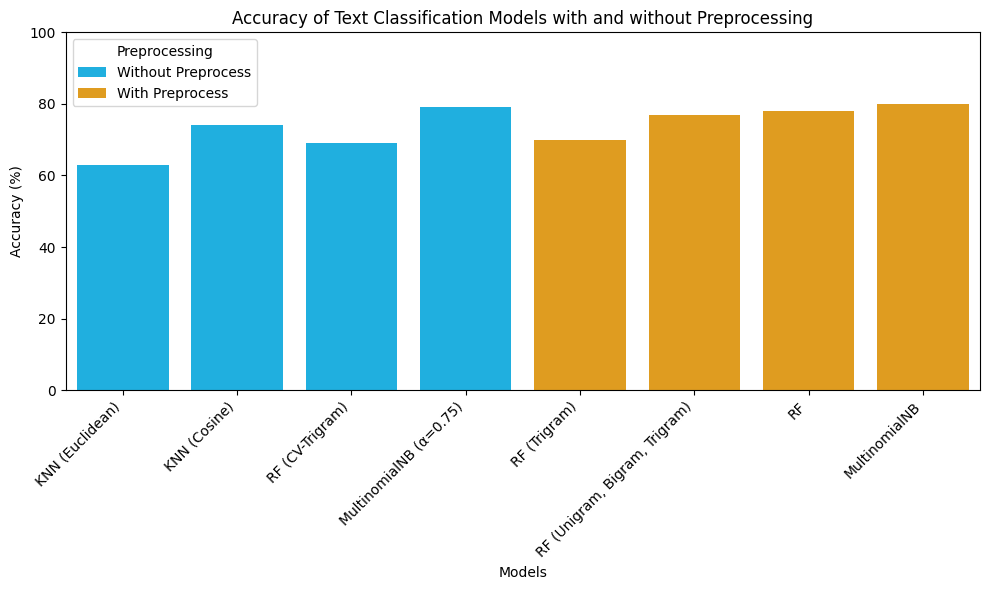

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data
data = {
    'Model': ['KNN (Euclidean)', 'KNN (Cosine)', 'RF (CV-Trigram)', 'MultinomialNB (α=0.75)',
              'RF (Trigram)', 'RF (Unigram, Bigram, Trigram)', 'RF', 'MultinomialNB'],
    'Accuracy (%)': [63, 74, 69, 79, 70, 77, 78, 80],
    'Preprocessing': ['Without Preprocess'] * 4 + ['With Preprocess'] * 4
}

df = pd.DataFrame(data)

# Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy (%)', hue='Preprocessing', data=df,
            palette={'Without Preprocess': 'deepskyblue', 'With Preprocess': 'orange'})
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy of Text Classification Models with and without Preprocessing')
plt.ylim(0, 100)  # Set y-axis limit from 0 to 100 for better visualization
plt.legend(title='Preprocessing')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show plot
plt.show()


## To check Prediction for testing the messages whether they are disasters related messages or not

In [78]:
from sklearn.feature_extraction.text import CountVectorizer

v=CountVectorizer()

X_train_cv=v.fit_transform(X_train.values)
X_train_cv

<6090x16988 sparse matrix of type '<class 'numpy.int64'>'
	with 61702 stored elements in Compressed Sparse Row format>

In [80]:
from sklearn.naive_bayes import MultinomialNB

model=MultinomialNB()
model.fit(X_train_cv,y_train)


MultinomialNB()

In [82]:
X_val_cv=v.transform(X_val)

In [84]:
from sklearn.metrics import classification_report

y_pred=model.predict(X_val_cv)

print(classification_report(y_val,y_pred))


              precision    recall  f1-score   support

           0       0.79      0.84      0.81       869
           1       0.77      0.71      0.74       654

    accuracy                           0.78      1523
   macro avg       0.78      0.77      0.78      1523
weighted avg       0.78      0.78      0.78      1523



In [86]:
msg=[
    'Typhoon Soudelor kills 28 in China and Taiwan',
    "They'd probably still show more life than Arsenal did yesterday, eh? EH?"]
msg_count=v.transform(msg)
model.predict(msg_count)

array([1, 0], dtype=int64)

In [88]:
# Step 6: Transform test data using the same CountVectorizer instance
X_test_cv = v.transform(X_test)

# Step 7: Make predictions on test data
test_predictions = model.predict(X_test_cv)

# Step 8: Save predictions and original text to a new file
test_data_with_predictions = pd.DataFrame({'text': X_test, 'predicted_label': test_predictions})
test_data_with_predictions.to_csv('test_predictions.csv', index=False)

print("Predictions saved to 'test_predictions.csv'.")

Predictions saved to 'test_predictions.csv'.


In [90]:

# Step 6: Load the test dataset
test_data = pd.read_csv('twitter_test.csv')  # Replace with your actual file path

# Step 7: Extract the text from the test dataset
X_test = test_data['text']

# Step 8: Transform test data using the same CountVectorizer instance
X_test_cv = v.transform(X_test)

# Step 9: Make predictions on test data
test_predictions = model.predict(X_test_cv)

# Step 10: Add predictions to the test dataset
test_data['predicted_label'] = test_predictions

# Step 11: Save the id, text, and predictions to a new file
test_data[['id',  'predicted_label']].to_csv('test_predictions.csv', index=False)

print("Predictions saved to 'test_predictions.csv'.")


Predictions saved to 'test_predictions.csv'.


In [92]:
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.metrics import ClassificationReport
# Define the pipeline
NB = Pipeline([
    ('vect', TfidfVectorizer()),  
    ('clf', MultinomialNB(alpha=0.75))  
])


# Fit the pipeline on the training data
NB.fit(X_train, y_train)

y_pred=NB.predict(X_val)

print(classification_report(y_val,y_pred))


              precision    recall  f1-score   support

           0       0.78      0.89      0.83       869
           1       0.82      0.67      0.74       654

    accuracy                           0.80      1523
   macro avg       0.80      0.78      0.79      1523
weighted avg       0.80      0.80      0.79      1523



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define the pipeline with TF-IDF vectorization and RandomForestClassifier
RF = Pipeline([
    ('vect', TfidfVectorizer()),
    ('clf', RandomForestClassifier())
])

# Define parameters for grid search
param_grid = {
    'vect__ngram_range': [(1, 1), (1, 2)],  # unigrams or bigrams
    'clf__n_estimators': [100, 200, 300],
    'clf__max_depth': [None, 10, 20, 30], 
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 4],
    'clf__max_features': ['auto', 'sqrt', 'log2']
}

# Perform grid search to find the best parameters
grid_search = GridSearchCV(RF, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters found: ", grid_search.best_params_)

# Evaluate on validation set
y_pred = grid_search.predict(X_val)
print(classification_report(y_val, y_pred))
